<a href="https://colab.research.google.com/github/imalearner96/Image-caption-generator/blob/maxpool_fixed/ML_project_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
!mkdir data
files.download("data")

!wget https://drive.google.com/drive/folders/17GWX5e9qRO3q0YTqqA9IO0bRpeK5dllz?usp=sharing

--2021-11-20 16:16:23--  https://drive.google.com/drive/folders/17GWX5e9qRO3q0YTqqA9IO0bRpeK5dllz?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.4.174, 2607:f8b0:4007:801::200e
Connecting to drive.google.com (drive.google.com)|172.217.4.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘17GWX5e9qRO3q0YTqqA9IO0bRpeK5dllz?usp=sharing.2’

17GWX5e9qRO3q0YTqqA     [ <=>                ] 222.38K  --.-KB/s    in 0.1s    

2021-11-20 16:16:24 (1.67 MB/s) - ‘17GWX5e9qRO3q0YTqqA9IO0bRpeK5dllz?usp=sharing.2’ saved [227712]



In [ ]:
import csv
import string
from PIL import Image
import os
import fnmatch
import numpy as np
import pandas as pd


class DataProcessing:
    """
    Class to Process the Data
    Methods
    -------
    caption_reader(): read captions from the txt/csv file
    clean_caption(): clean the captions
    process_images(): change the image dimensions and store in data
    """

    def __init__(self):
        """
        Constructor for Data Processing class
        """
        self.data = {}
        self.punctuations = string.punctuation
        self.embedding_dictionary = {}

    def caption_reader(self):
        """
        read data into dictionary from txt/csv file
        """
        # hardcoded path change in future
        caption_file_path = "/Users/sayandas/Downloads/flickr30k_images/results.csv"
        with open(caption_file_path, mode='r') as file:  # open the file
            reader = csv.reader(file)  # read the file
            next(reader)  # ignore header line
            for row in reader:  # add data to dictionary
                if row[0] not in self.data:
                    self.data[row[0]] = {'captions': list()}
                self.data[row[0]]['captions'].append(self.clean_captions(row[1]))

    def clean_captions(self, caption):
        """
        cleaning data
        :param caption: caption to be cleaned
        :return: cleaned caption
        """
        word_list = caption.lower().split()  # tokenize
        word_list = [word for word in word_list if len(word) > 1]  # remove hanging words
        for punctuation in self.punctuations:  # remove punctuations
            if punctuation in word_list:
                word_list.remove(punctuation)
        return ' '.join(word_list)

    # def word_embedding(self):
    #     """
    #
    #     """
    #     glove_dir = "/Users/revagupta/Documents/UTD/Second Sem/CS-6375 ML/ML_Project/glove/glove.6B.200d.txt"
    #     with open(glove_dir, encoding="utf-8", mode='r') as file: # open the file
    #         reader = csv.reader(file)  # read the file
    #         for row in reader:
    #             print(row)
    #             # row = row[0].split()
    #             # print(row)
    #             # word = row[0]
    #             # coef = np.asarray(row[1:], dtype='float32')
    #             # self.embedding_dictionary[word] = coef

    def process_images(self):
        """
        Read the images, change its dimension and store in dictionary
        """
        # hardcoded path change in future
        image_folder_path = "/Users/sayandas/Downloads/flickr30k_images/flickr30k_images/"
        for file in os.listdir(image_folder_path):  # Pick list of images
            if fnmatch.fnmatch(file, "*.jpg"):  # check if the file is a jpg file
                image = Image.open(image_folder_path + "/" + file)  # opening the file
                image = np.asarray(image)   # converting image into array
                image_resize = np.resize(image, (224, 224, 3))  # reshaping the image
                self.data[file]["image_vector"] = image_resize  # storing the image in the dictionary


if __name__ == "__main__":
    data_processing = DataProcessing()
    print("Processing Captions")
    data_processing.caption_reader()
    print("Processing Images")
    data_processing.process_images()

(224, 224, 3)

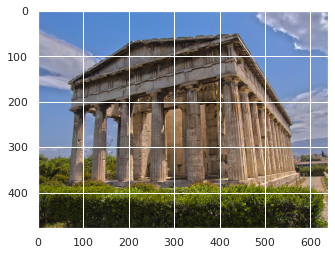

In [ ]:
##dummy image array
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set(color_codes=True)
# Read the image
image = cv2.imread('temple.jpg') #--imread() helps in loading an image into jupyter including its pixel values
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
#plt.show()
#image.shape


image = cv2.imread('temple.jpg')  # opening the file
image = np.asarray(image)   # converting image into array
image_resize = np.resize(image, (224, 224,3)) 

l1 = Maxpool(3,0,1)
res1 = l1.forward(image_resize)
res1.shape

res2 = l1.backward(res1)
res2.shape


In [ ]:
class ActivationFunction:
  def __init__(self):
    self.input = None

  def sigmoid(self, input):
    return 1/(1+exp(-input))

  def relu(self, input):
    for i in range(0,len(input)) :
      if input[i] <= 0: input[i] = 0

    return input

  def tanh(self, input):
    return (exp(input)-exp(-input))/(exp(input)+exp(-input));

class Derivative(ActivationFunction):
  def __init__(self):
    self.input = None

  def dSigmoid(self, input):
    return sigmoid(input) * (1 - sigmoid(input));

  def dRelu(self, input):
    for i in range(0,len(input)):
      if input[i] > 0: input[i] = 1

    return input


  def dTanh(self, input):
    return 1 - (tanh(input)^2);

In [ ]:

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass



class Activation(Layer):
  
  def __init__(self, func):
    self.input = None
    self.output = None
    self.fn = ActivationFunction()
    self.fnprime = Derivative()
    self.func = func

  def forward(self, input):
    
    if(self.func == 'sigmoid'):
      output = self.fn.sigmoid(input);
    elif(self.func == 'tanh'):
      output = self.fn.tanh(input);
    else:
      output = self.fn.relu(input);

    return output

  def backward(self, output_gradient, learning_rate):
    if(self.func == 'sigmoid'): 
      return np.dot(output_gradient, self.fnprime.dSigmoid(output));
    elif(self.func == 'tanh'): 
      return np.dot(output_gradient, self.fnprime.dTanh(output));
    else : 
      return np.dot(output_gradient, self.fnprime.dRelu(output));



In [ ]:
class Dense(Layer):
  def __init__(self, inputSize, outputSize):
    super.__init__()
    self.weights = np.random.rand(inputSize, outputSize)
    self.bias = np.random.rand(inputSize, 1)

  def forward(self, input):
    return np.sum(np.dot(weights,input) , bias);

  def backward(self, output_gradient, learning_rate):
    self.weight_gradient = np.dot(output_gradient , self.input.T);
    self.bias_gradient = output_gradient;
    self.weights -= learning_rate * self.weight_gradient;
    self.bias -= learning_rate * self.bias_gradient;

    return np.dot(self.weights.T, output_gradient)

In [ ]:
class Maxpool(Layer):


    def __init__(self, kernel_size, padding, stride):
      self.kernel_size = kernel_size
      self.padding = padding
      self.stride = stride
      self.max_idx_stack_i = []                                
      self.max_idx_stack_j = [] 
      self.max_idx_stack_dpth = [] 

    def max(self, a, b):
      if a > b : return a
      return b


    def forward(self, X):
      self.h_in = X.shape[0] #height
      self.w_in = X.shape[1] #width
      self.d_in = X.shape[2] #depth

      self.h_out = ((self.h_in + 2*self.padding - (self.kernel_size - 1) - 2) / self.stride) + 1
      self.w_out = ((self.w_in + 2*self.padding - (self.kernel_size - 1) - 2) / self.stride) + 1
      self.h_out, self.w_out = int(self.h_out), int(self.w_out)
      
      input = np.zeros((self.h_in + 2*self.padding, self.w_in + 2*self.padding, self.d_in))
      #input.zeroes(self.h_in + 2*self.padding, self.w_in + 2*self.padding); #initialize to zero

      for d in range(0, self.d_in):
        for i in range(self.padding, input.shape[0]-self.padding):
          for j in range(self.padding, input.shape[1]-self.padding):
            input[i][j][d] = X[i-self.padding][j-self.padding][d];

      output = []

      for dpth in range(0, self.d_in):
        for i in range(0,input.shape[0]-self.kernel_size, self.stride):
          for j in range(0,input.shape[1]-self.kernel_size, self.stride):
            mx = 0
            tmp_a = tmp_b = tmp_d = 0
            for a in range(i,i+self.kernel_size):
              for b in range(j,j+self.kernel_size):
                if(mx < input[a][b][dpth]):
                  mx = input[a][b][dpth]
                  tmp_a = a
                  tmp_b = b
                  tmp_d = dpth

            self.max_idx_stack_i.append(tmp_a)
            self.max_idx_stack_j.append(tmp_b)
            self.max_idx_stack_dpth.append(tmp_d)
            output.append(int(mx))

      # #depth of output is same as depth of input
         
      # output = np.asarray(output)
      # #op1 = output[:self.h_out * self.w_out * self.d_in]
      op1 = np.reshape(output,(self.h_out, self.w_out, self.d_in)) 
      
      return op1


    def backward(self, output_gradient):
      # h_in = output_gradient.shape[0] #height
      # w_in = output_gradient.shape[1] #width
      # d_in = output_gradient.shape[2] #depth

      # # h_out = ((h_in) * self.stride) - (2*self.padding)
      # # w_out = ((w_in) * self.stride) - (2*self.padding)
      
      input_gradient = np.zeros((self.h_in, self.w_in, self.d_in))
      output_gradient = output_gradient.flatten()
      #np.reshape(output_gradient, (1,output_gradient.shape[0] * output_gradient.shape[1] * output_gradient.shape[2]))
      for i in range(0,len(self.max_idx_stack_i)):
        input_gradient[self.max_idx_stack_i[i]][self.max_idx_stack_j[i]][self.max_idx_stack_dpth[i]] = (int)(output_gradient[i])
        
      self.max_idx_stack_i = []                                
      self.max_idx_stack_j = [] 
      self.max_idx_stack_dpth = [] 


      return input_gradient
      #return input_gradient


In [ ]:
a = np.array([[[1,2],[3,4],[4,3]],[[2,3],[1,2],[5,3]]])
a.flatten()

array([1, 2, 3, 4, 4, 3, 2, 3, 1, 2, 5, 3])

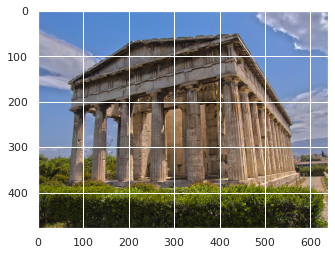

In [ ]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set(color_codes=True)
# Read the image
image = cv2.imread('temple.jpg') #--imread() helps in loading an image into jupyter including its pixel values
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
#plt.show()
#image.shape


image = cv2.imread('temple.jpg')  # opening the file
image = np.asarray(image)   # converting image into array
image_resize = np.resize(image, (224, 224, 3)) 

In [ ]:
convLayer1 = Convolutional(in_channels = 3, out_channels = 64, kernel_size = 3 ,padding = 0 , stride=1)
tmp = convLayer1.forward(image_resize)
tmp1 = convLayer1.backward(tmp,0.01)
tmp1

ValueError: ignored

In [ ]:
#tmp.shape
import numpy as np
a = np.empty(shape=(1,))
np.insert(a, a.shape[0], 87, axis = 0)
a

array([5.e-324])

In [ ]:
import math

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass


class Convolutional(Layer):

    def correlateBackward(self, A, B):
      output = np.zeros(shape=((int(A.shape[1]/B.shape[1]) , int(A.shape[2]/B.shape[2]), A.shape[0])))

      for d in range(0, A.shape[0]):
        for i in range(0,A.shape[1]-B.shape[1]):
          for j in range(0,A.shape[2]-B.shape[2]):
            submtx = A[i:i+B.shape[1], j:j+B.shape[2]][d]
            output[i][j][d] = np.sum(submtx * B[d])

      return output


    def convolveBackward(self, A, B):
      # k = self.onek_rotate180Backprop(B)
      return self.correlateBackward(A, B)

    def correlate(self, input, kernel, biases):
      output_matrix = biases
      input_matrix_shape = input.shape #h * w * d
      kernel_shape = kernel.shape #no of kernels * depth * height * width
      for k in range(kernel_shape[0]):
        for i in range(0,input_matrix_shape[0]-kernel_shape[2]):
          for j in range(0,input_matrix_shape[1]-kernel_shape[3]):
            for d in range(kernel_shape[1]):
              ip_submtx = input[i:i+kernel_shape[2], j:j+kernel_shape[3]][d]
              #output_matrix[d].push(ip_submtx * kernel[k][d]) #Hadamard product
              output_matrix[i][j][k] = np.sum(ip_submtx * kernel[k][d]) #Hadamard product
        
      return output_matrix

    def onek_rotate180(self, kernel):

      for k in range(kernel.shape[0]): #dimensions : no of kernels * depth * height * width
        for d in range(kernel.shape[1]):
          kernel_shape = kernel[k][d].shape
          a = kernel[k][d].flatten()
          #print(a)
          # rev_a = a[::-1]
          rev_a = np.flip(a)
          rev_a = rev_a.reshape((kernel_shape[0],kernel_shape[1]))
          kernel[k][d] = rev_a.reshape(kernel_shape[0],kernel_shape[1])

      return kernel
      #return 1
      # return self.kernels

    def convolve(self, input, kernel, bias):
      k = self.onek_rotate180(kernel)
      return self.correlate(input, k, bias)

    def __init__(self, in_channels, out_channels, kernel_size, padding, stride):
        self.kernels_shape = (out_channels, in_channels , kernel_size, kernel_size) #number of kernels * depth of each kernel * height * width
        self.kernels = np.random.rand(self.kernels_shape[0],self.kernels_shape[1],self.kernels_shape[2],self.kernels_shape[3])
        self.padding = padding
        self.stride = stride
        self.in_channels = in_channels
        self.out_channels = out_channels

    def forward(self, X):
        self.h_in = X.shape[0] #height
        self.w_in = X.shape[1] #width
        self.d_in = X.shape[2] #depth
        self.X = X
        self.h_out = ((self.h_in + 2*self.padding) / self.stride)
        self.w_out = ((self.w_in + 2*self.padding) / self.stride)
        self.h_out, self.w_out = int(self.h_out), int(self.w_out)
        
        self.padded_input = np.zeros((self.h_in + 2*self.padding, self.w_in + 2*self.padding, self.d_in))
        for d in range(0, self.padded_input.shape[2]):
          for i in range(self.padding, self.padded_input.shape[0]-self.padding):
            for j in range(self.padding, self.padded_input.shape[1]-self.padding):
              self.padded_input[i][j][d] = X[i-self.padding][j-self.padding][d];
        
        #self.input_shape = input.shape # h * w * d

        #bias shape 
        self.bh = int((self.padded_input.shape[0] + 2*self.padding) / self.stride)
        self.bw = int((self.padded_input.shape[1] + 2*self.padding) / self.stride)
        self.bias_shape = (self.bh, self.bw, self.out_channels) #dimensions of bias -> h * w * d
        #print(self.bias_shape)
        #self.biases = np.random.rand(224,224,3)
        self.biases = np.random.rand(self.bias_shape[0],self.bias_shape[1],self.bias_shape[2])

        return self.convolve(self.padded_input,self.kernels, self.biases)

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros((self.h_in, self.w_in, self.d_in))

        kernels_gradient = self.correlateBackward(self.padded_input, output_gradient) #set bias to zero
        input_gradient = self.convolveBackward(output_gradient, self.kernels) #set bias to 0
        
        #self.kernels -= learning_rate * kernels_gradient
        #self.biases -= learning_rate * output_gradient
        return kernels_gradient
        #return input_gradient

In [ ]:
import numpy as np

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass


class Flatten(Layer):

  def __init__(self):
    pass

  def forward(self, input):
    self.input_shape = input.shape
    input = np.reshape(input,(1, self.input_shape[0] * self.input_shape[1] * self.input_shape[2]))
    return input

  def backward(self, output_gradient):
    input_gradient = np.reshape(output_gradient,self.input_shape)
    return input_gradient
        

In [ ]:
import numpy as np
x = np.array([[1,2,3],[1,2,3],[1,2,3]])
y_shape = (x.shape[0],-1)
out = x.ravel().reshape(9,-1)
out


z = out.reshape(x.shape)
z

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [ ]:
# CNN = [
#        Convolutional(224 * 224 * 3 , 113, 64),
#        MaxPool(224 * 224, 112, 1),
#        Convolutional(112 * 112 * 64 , 57, 128),
#        MaxPool(112 * 112, 56, 1),
#        Convolutional(56 * 56 * 128 , 29, 256),
#        MaxPool(56 * 56, 28, 1),       
#        Convolutional(28 * 28 * 256 , 15, 512),
#        MaxPool(28 * 28, 14, 1),
#        Convolutional(14 * 14 * 512 , 8, 512),
#        MaxPool(14 * 14, 7, 1),
#        Convolutional(7 * 7 * 512 , 15, 512),
#        Flatten(7*7*512)
# ]

epochs = 20
convLayer1 = Conv(in_channels = 3, out_channels = 64, kernel_size = 3 ,padding = 0 , stride=1)
mxPoolLayer1 = MaxPool(3, stride=2, padding = 1)
relu = ActivationFunction.relu()

convLayer2 = Conv(in_channels = 64, out_channels = 128, kernel_size = 3 ,padding = 1 , stride=1)
mxPoolLayer2 = MaxPool(3, stride=2, padding = 1)
relu = ActivationFunction.relu()

convLayer3 = Conv(in_channels = 128, out_channels = 256, kernel_size = 3 ,padding = 1 , stride=1)
mxPoolLayer3 = MaxPool(3, stride=2, padding = 1)
relu = ActivationFunction.relu()

convLayer4 = Conv(in_channels = 256, out_channels = 512, kernel_size = 3 ,padding = 1 , stride=1)
mxPoolLayer4 = MaxPool(3, stride=2, padding = 1)
relu = ActivationFunction.relu()

convLayer5 = Conv(in_channels = 512, out_channels = 512, kernel_size = 3 ,padding = 1 , stride=1)
mxPoolLayer5 = MaxPool(3, stride=2, padding = 1)
relu = ActivationFunction.relu()

flat = Flatten



for epoch in range(epochs) :

  t = convLayer1.forward(t)
  t = maxPoolLayer1.forward(t)
  t = convLayer2.forward(t)
  t = maxPoolLayer2.forward(t)
  t = convLayer3.forward(t)
  t = maxPoolLayer3.forward(t)
  t = convLayer4.forward(t)
  t = maxPoolLayer4.forward(t)
  t = convLayer5.forward(t)
  t = maxPoolLayer5.forward(t)
  t = flat.forward(t)

  dE = RNN(t)

  dE = flat.backward(dE)
  dE = maxPoolLayer5.backward(dE)
  dE = convLayer5.backward(dE)
  dE = maxPoolLayer4.backward(dE)
  dE = convLayer4.backward(dE) 
  dE = maxPoolLayer3.backward(dE)
  dE = convLayer3.backward(dE)
  dE = maxPoolLayer2.backward(dE)
  dE = convLayer2.backward(dE)
  dE = maxPoolLayer1.backward(dE)
  convLayer1.backward(dE)



In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import torch
# from torch.nn import Conv2d, MaxPool2d, ReLU, Sequential, Flatten
# from torch.optim import Adam, SGD
# import cv2
# from torchvision import transforms

# img_training_set = []
# #img_base_folder = '/trainingset'

# img_path = '667626_18933d713e.jpg'
# img = cv2.imread(img_path)
# #print(img)
# #normalization
# img = img/255
# img = img.astype('float32')

# img = cv2.resize(img, (224,224))
# #convert input image dimensions to fixed CNN arch dimensions
# t = torch.tensor(img, dtype=torch.float).permute(2,0,1).unsqueeze(0)
# t.shape 
# X_reshaped = t.reshape(t.shape[0] * t.shape[1], 1, t.shape[2], t.shape[3])
# X_col = im2col(X_reshaped, self.size, self.size, padding=0, stride=self.stride)

NameError: ignored